In [12]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

### Load data

In [13]:
# Load cleaned data
train_data = pd.read_csv('../data/cleaned_dataset/cleaned_standardized_train_data.csv')
test_data = pd.read_csv('../data/cleaned_dataset/cleaned_standardized_test_data.csv')

In [14]:
# Split loaded data into data and target
X_train = train_data[train_data.columns[:-1]]
y_train = train_data['goal']

X_test = test_data[test_data.columns[:-1]]
y_test = test_data['goal']

In [15]:
# Convert train and test data to array
X_train_scaled = X_train.to_numpy()
X_test_scaled = X_test.to_numpy()

### Fit PCA without specifying components

In [16]:
# Fit PCA without specifying components
# Apply PCA
pca = PCA()
pca.fit(X_train_scaled)

# Explained variance ratios
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

In [17]:
optimal_n_components = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components: {optimal_n_components}")

Number of components: 14


### Apply PCA with optimal number of components

In [18]:
pca_optimal = PCA(n_components=optimal_n_components)
X_train_pca = pca_optimal.fit_transform(X_train_scaled)
X_test_pca = pca_optimal.transform(X_test_scaled)

In [19]:
# Convert PCA transformed data into data frame
columns = [f"PC{i+1}" for i in range(optimal_n_components)]
X_train_pca_df = pd.DataFrame(X_train_pca, columns=columns)
X_test_pca_df = pd.DataFrame(X_test_pca, columns=columns)

pd.concat([X_train_pca_df, y_train], axis=1).to_csv('../data/pca_transformed_dataset/pca_transformed_train_data.csv', index=False)
pd.concat([X_test_pca_df, y_test], axis=1).to_csv('../data/pca_transformed_dataset/pca_transformed_test_data.csv', index=False)

### Visualize PCA results using a scatter plot and cumulative variance plot.

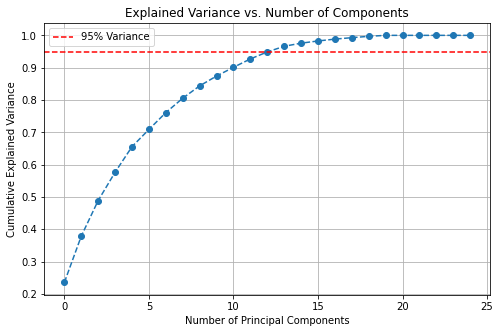

In [20]:
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance vs. Number of Components')
plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
plt.legend()
plt.grid(True)
plt.show()

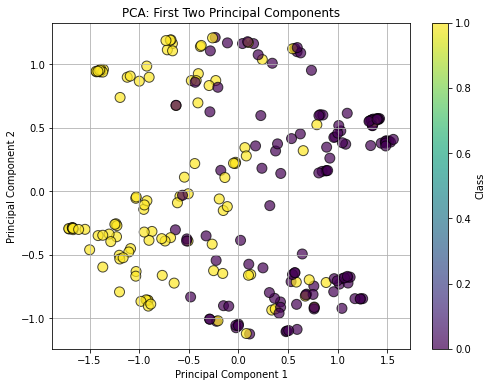

In [21]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='viridis', alpha=0.7, edgecolor='k', s=100)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA: First Two Principal Components')
plt.colorbar(scatter, label='Class')
plt.grid(True)
plt.show()

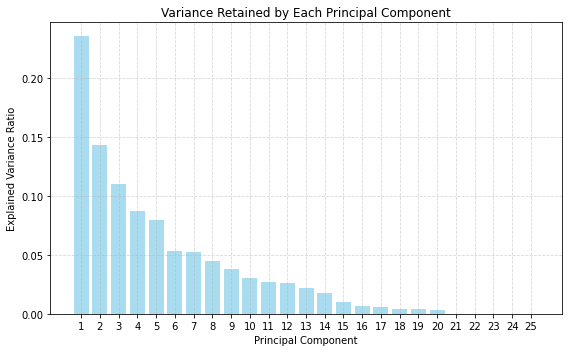

In [22]:
plt.figure(figsize=(8, 5))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.7, color='skyblue')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Variance Retained by Each Principal Component')
plt.xticks(range(1, len(explained_variance_ratio) + 1))
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()